# Backtesting

## Backtesting => Disclaimer

    Backtesting Vs RiskManagement

## Tipos de Backtests

    * Enfoque Matricial (discreto)
    * Enfoque Event-Driven (simil continuo)
    * Criterios de realismo
        * Tipos activos/takers ¿Que condicion impongo para volumenes/ventanas de tiempo?
        * Tipos posivos/makers ¿Que % de ejecución bajo X Circunstancias asumo?
        * En gral ¿hubiera afectado mi orden al mercado? ¿como lo se? ¿como lo valido? ¿que puedo asumir?
        * Costos tranasaccionales, comision, derechos de mercado, spread, impuestos, costos infraestr, mkt data etc

## Etapas de un Backtest

* PreBackTest (Etapa de Research)
    * Armado de tablas de indicadores potenciales
    * Planteo de "Racional" o Hipótesis de trabajo
    * Análisis de correlación
        * Regresiones inputs/forwards
        * Algos de clasificacion o probabilidades de suba o baja en funcion de inputs
    * Tabla de posibles trades pasados el racional de trading
    * Tabla de resultados o reporting básico
        * % de trades positivos y negativos
        * Esperanza matemática del método
        * Tiempo comprado / libre
        
        
* Backtest básico
    * Trades en un grupo de activos, en un rango de parametros
    * Tabla de resultados intermedia
        * Resultados año a año
        * Comparación con el buy&Hold
        * Comparación con el banchmark
        * Ratios de riesgo (Sharpe, Sortino, etc)
        


* Análisis de sensibilidad
    * Parametrización de variables
    * Cambio de indicadores
    * Uso de grupos de control
    


* Análisis de portabilidad
    * Riesgo de overfiting
    * Cruce y armado de matrices de resultados
    * Matrices de correlacion cross mkt
    * Matrices de correlacion cross time-frame
    * Clusterizacion por régimenes (volatilidad, épocas, ciclos etc)
    
    
* Backtest Avanzado
    * Manejo de posición/riesgo, exposición óptima (Kelly, Montecarlo etc)
    * Factibilidad técnica (volúmenes, liquidez, spreads, fallas, tiempos etc)

## Reporting Ejemplo básico

<img src='imagenes/backtest.png'>

## Objetivos principales de cada etapa

### 1- PreBackTest (Etapa de Research)

   El objetivo es plantear todo tipo de idea posible, verificar antes que nada la correlación entre los inputs planteados y la reacción del mercado, etc
    
   La idea es plantear la mayor cantidad de hipótesis posibles, ser amplio en la visión y riguroso en que sirve y que no sirve, ante la duda dejar para validar mas adelante

        
        
### 2- Backtest básico

   El objetivo principal es empezar a validar en forma rápida la conveniencia de aplicar un método algoritmico, tanto por el riesgo asumido como contra eel benchmark de su mercado y la variabilidad en diferentes contextos, epocas etc..
    
        
### 3- Análisis de sensibilidad

   El objetivo principal de esta etapa es el análisis de cada parámetro del sistema, ver como varían los resultados variando todo tipo de parámetro, donde aumentan o disminuyen la cantidad de señales, de eventos positivos, negativos, extremos, medios, largos, cortos, etc. 
    
   Claramente es la etapa mas abierta que puede dar pie a volver a la etapa de research y empezar a replantear indicadores


### 4- Análisis de portabilidad

   Es el anteúltimo filtro del método es la prueba de fuego al overfiting, aque se pone a prueba el método frente a diferentes mercados, a diferentes timeframes, a diferentes activos o grupos de activos etc, obviamente no necesariamente tiene que ser portable a todo, pero tampoco puede ser un método aplicable a un solo activo en un solo timeframe en una sola época
    
   Si bien siempre hay variabilidad, un método bien robusto se mueve en rangos acotados, es decir no puede dar lo contrario en un activo que en otro, puede performar un poco mejor un poco peor, etc, de hecho si construyen una distribucion de rendimientos a varios activos, mientras menor desvio del rendimiento mas robusto el método o mas portable entre activos
    
   Es muy util en este punto los algos de clusterizacion para ver comportamiento en diferentes clusters (que pueden ser régimenes de volatilidad, volumen, tendencias, etc..)
    
    
### 5- Backtest Avanzado
    
   Esta es la etapa final, aquí se valida la viabilidad en cuanto a liquidez, costo transaccional, spreads, posibles fallas del mercado, apis, tiempos, volúmenes, reglamentaciones, etc
    
   También se valida la exposición real y el manejo de posicion buscando un tamaño de posición óptima al riesgo a asumir, esto puede estimarse via montecarlo o modelarse con criterios como kelly

## Que tipo de operatoria algoritmica se backtestea?

## Diferencias entre backtest y simulacion?

¿cuando una simulación NO sirve?

# Bots

## Tipos de Bots de Trading

BOTs de DataFeed / Screeners

BOTs de Trading

    A- Bots de Colocación de grandes órdenes, para no alterar precio
    B- Bots de Colocación de órdenes, para obtener el mejor precio
    C- Bots de Market Making
    D- Bots de Arbitrajes en un mercado
    E- Bots de Arbitrajes entre mercados
    F- Bots de Arbitrajes estadísticos (en un mercado o entre mercados)
    G- Bots de Hedging
    H- Bots de Balanceo de carteras (optimización, riesgo, etc)
    I- Bots de ruteo para seguimiento de índices (fondos, etfs)
    J- Bots de scalping
    K- Bots de swing trading


BOTs estratégicos

* Bots de detección de otros bots
* Bots de risk Management

# Armado matriz básica

In [12]:
import yfinance as yf
import numpy as np

data = yf.download('AAPL' , auto_adjust=True)
COSTO = 0.001

data['va'] = data.Close.pct_change() - COSTO
data['va_log'] = np.log(data.Close / data.Close.shift()) - COSTO

fast, slow = 20, 60
data['sma_fast'] = data.Close.ewm(span=fast).mean()
data['sma_slow'] = data.Close.ewm(span=slow).mean()

# Atenti, en esta linea -- Importantisimo el shift()!!
data['cruce'] = (data.sma_fast / data.sma_slow - 1).shift()

data['estado'] = np.where(data.cruce > 0, 'in', 'out')

data['accion'] = np.where( (data.estado=='in') & (data.estado.shift()=='out'), 'Comprar',                          
                         np.where( (data.estado=='out') & (data.estado.shift()=='in'), 'Vender', 'Sin Accion'))

data = data.dropna()
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,va,va_log,sma_fast,sma_slow,cruce,estado,accion
Date,,,,,,,,,,,,
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,-0.052170,-0.053580,0.097991,0.098079,0.000000,out,Sin Accion
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,-0.073398,-0.076231,0.094501,0.094774,-0.000893,out,Sin Accion
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.024751,0.024449,0.093397,0.093698,-0.002882,out,Sin Accion
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.028992,0.028580,0.093374,0.093614,-0.003213,out,Sin Accion
1980-12-19,0.098999,0.099437,0.098999,0.098999,48630400,0.061029,0.059239,0.094561,0.094588,-0.002557,out,Sin Accion
1980-12-22,0.103817,0.104256,0.103817,0.103817,37363200,0.048670,0.047522,0.096311,0.096041,-0.000283,out,Sin Accion
1980-12-23,0.108198,0.108636,0.108198,0.108198,46950400,0.042199,0.041333,0.098366,0.097744,0.002805,in,Comprar
1980-12-24,0.113892,0.114330,0.113892,0.113892,48003200,0.052628,0.051290,0.100856,0.099787,0.006358,in,Sin Accion
1980-12-26,0.124405,0.124843,0.124405,0.124405,55574400,0.092309,0.088294,0.104402,0.102634,0.010717,in,Sin Accion


# Graficamos a ver si tiene sentido lo que pensamos

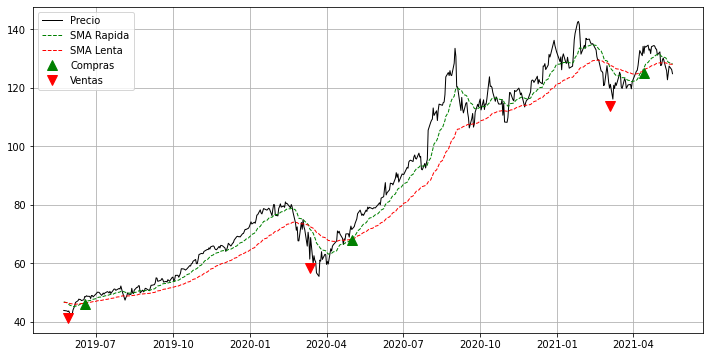

In [14]:
import matplotlib.pyplot as plt

# Filtro
df = data.iloc[-500:]
compras = df.loc[data.accion=='Comprar']
ventas = df.loc[data.accion=='Vender']


fig, ax = plt.subplots(figsize=(12,6))

# lw: linewidth..

ax.plot(df.Close, '-k', lw=1, label='Precio')
ax.plot(df.sma_fast, '--g', lw=1, label='SMA Rapida')
ax.plot(df.sma_slow, '--r', lw=1, label='SMA Lenta')

ax.plot(compras.Close * 0.95, marker='^', lw=0, markersize=10, color='g', label='Compras')
ax.plot(ventas.Close * 0.95, marker='v', lw=0, markersize=10, color='r', label='Ventas')
ax.legend()
ax.grid(axis='both')

## Calculos a ver si tiene sentido en gral

In [19]:
data.groupby('estado').va.sum()

estado
in     8.387845
out    2.971688
Name: va, dtype: float64

In [16]:
data.groupby('estado').va_log.sum()

estado
in     6.067289
out    1.054929
Name: va_log, dtype: float64

In [5]:
data.groupby('estado').size()

estado
in     6427
out    3766
dtype: int64

In [6]:
(data.loc[data.estado=='in'].va +1).cumprod()

Date
1980-12-23      1.042199
1980-12-24      1.097048
1980-12-26      1.198315
1980-12-29      1.215192
1980-12-30      1.185658
                 ...    
2021-05-12    424.320432
2021-05-13    431.924137
2021-05-14    440.495554
2021-05-17    436.417210
2021-05-18    431.509381
Name: va, Length: 6427, dtype: float64

¿me emociono o mejor compro pesos y al colchón?

¿contra que mido si es bueno o no? 

## Armado de matriz de trades

In [7]:
import pandas as pd

compras = data.loc[data.accion=='Comprar']
ventas = data.loc[data.accion=='Vender']

tabla = pd.concat([compras, ventas], axis=0).sort_index().loc[:,['Close','Volume','estado','accion']]
tabla

,Close,Volume,estado,accion
Date,,,,
1980-12-23,0.108198,46950400,in,Comprar
1981-02-02,0.093304,23766400,out,Vender
1981-04-24,0.101627,35056000,in,Comprar
1981-07-06,0.087171,16531200,out,Vender
1981-12-21,0.076658,56403200,in,Comprar
...,...,...,...,...
2019-06-18,48.699249,106204000,in,Comprar
2020-03-12,61.475739,418474000,out,Vender
2020-05-01,71.590034,240616800,in,Comprar


# ideas de Parametrizacion 

## Buscamos el mejor momento para anticipar o retrasar la entrada

In [8]:
data = yf.download('AAPL' , auto_adjust=True)
data['va'] = data.Close.pct_change()
data['va_log'] = np.log(data.Close / data.Close.shift())

fast, slow = 20, 60
data['sma_fast'] = data.Close.ewm(span=fast).mean()
data['sma_slow'] = data.Close.ewm(span=slow).mean()
data['cruce'] = (data.sma_fast / data.sma_slow - 1).shift()

data['estado'] = None

results = []
for i in range(100):
    x = -0.5 + i/100
    data['estado'] = np.where(data.cruce > x, 'in', 'out')
    res = data.loc[data.estado=='in'].va_log.sum()
    results.append((round(res,2), round(x,2)))

[*********************100%***********************]  1 of 1 completed


In [9]:
results

[(7.12, -0.5),
 (7.12, -0.49),
 (7.12, -0.48),
 (7.12, -0.47),
 (7.12, -0.46),
 (7.12, -0.45),
 (7.12, -0.44),
 (7.12, -0.43),
 (7.12, -0.42),
 (7.12, -0.41),
 (7.12, -0.4),
 (7.12, -0.39),
 (7.12, -0.38),
 (7.12, -0.37),
 (7.12, -0.36),
 (6.98, -0.35),
 (6.97, -0.34),
 (7.05, -0.33),
 (7.15, -0.32),
 (7.17, -0.31),
 (7.14, -0.3),
 (7.43, -0.29),
 (7.42, -0.28),
 (7.39, -0.27),
 (7.35, -0.26),
 (7.42, -0.25),
 (7.31, -0.24),
 (7.27, -0.23),
 (7.13, -0.22),
 (6.97, -0.21),
 (7.05, -0.2),
 (7.16, -0.19),
 (7.09, -0.18),
 (7.18, -0.17),
 (6.81, -0.16),
 (6.86, -0.15),
 (6.88, -0.14),
 (6.45, -0.13),
 (6.57, -0.12),
 (7.19, -0.11),
 (7.0, -0.1),
 (7.2, -0.09),
 (6.65, -0.08),
 (6.59, -0.07),
 (6.91, -0.06),
 (8.21, -0.05),
 (7.08, -0.04),
 (7.59, -0.03),
 (7.36, -0.02),
 (6.45, -0.01),
 (6.07, 0.0),
 (5.3, 0.01),
 (6.21, 0.02),
 (5.02, 0.03),
 (4.48, 0.04),
 (3.93, 0.05),
 (3.48, 0.06),
 (2.28, 0.07),
 (1.76, 0.08),
 (1.44, 0.09),
 (0.42, 0.1),
 (0.27, 0.11),
 (0.48, 0.12),
 (0.07, 0.13),


In [10]:
# Grafico del barrido segun % del cruce

<AxesSubplot:xlabel='1'>

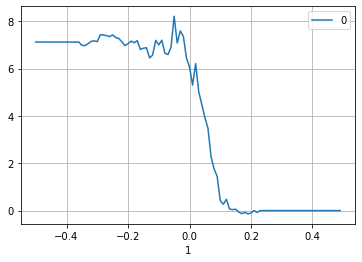

In [11]:
pd.DataFrame(results).set_index(1).plot(grid=True)

## Buscamos el cruce mejor

In [20]:
import pandas as pd

data = yf.download('AMZN' , auto_adjust=True)
data['va'] = data.Close.pct_change()
data['va_log'] = np.log(data.Close / data.Close.shift())

results = []
for fast in range(10,40):
    for slow in range(25,70,2):
        
        # fast=39, slow=25 NO VALIDO
        if fast < slow:
        
            data['sma_fast'] = data.Close.rolling(fast).mean()
            data['sma_slow'] = data.Close.rolling(slow).mean()
            data['cruce'] = (data.sma_fast / data.sma_slow - 1).shift()
            data['estado'] = np.where(data.cruce > -0.01, 'in', 'out')
            
            res = data.loc[data.estado=='in'].va_log.sum()
            results.append({'par':(slow,fast), 'resultado':res})
            
            print(f'procesando fast: {fast}, slow:{slow}      ', end='\r')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='par'>

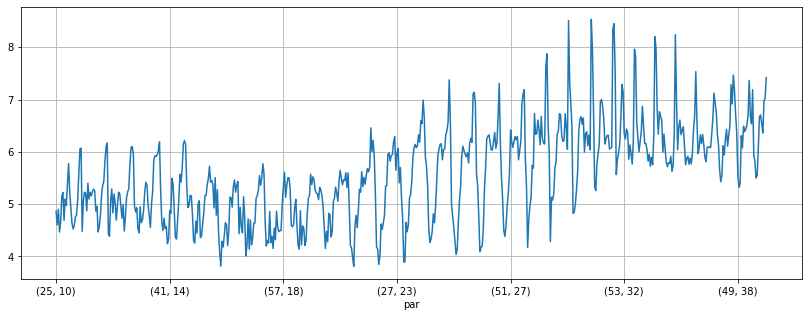

In [22]:
resultado = pd.DataFrame(results).set_index('par')
resultado.resultado.plot(grid=True, figsize=(14,5))

y ahora?

## Analisis de sensibilidad multivariable

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.cm as cm

[*********************100%***********************]  1 of 1 completed
Wall time: 5.38 s5     


<AxesSubplot:xlabel='par'>

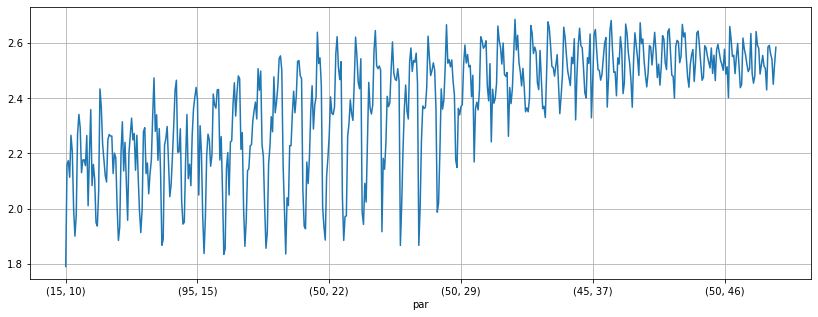

In [25]:
%%time

data = yf.download('SPY' , auto_adjust=True)
data['va'] = data.Close.pct_change()
data['va_log'] = np.log(data.Close / data.Close.shift())

results = []
for fast in range(10,50):
    for slow in range(10,100,5):
        if fast < slow:
        
            data['sma_fast'] = data.Close.ewm(fast).mean()
            data['sma_slow'] = data.Close.ewm(slow).mean()
            data['cruce'] = (data.sma_fast / data.sma_slow - 1).shift()
            data['estado'] = np.where(data.cruce > 0, 'in', 'out')

            res = data.loc[data.estado=='in'].va_log.sum()
            results.append({'par':(slow,fast),'Fast':fast, 'Slow':slow,
                            'dias_in':len(data.loc[data.estado=='in']), 'resultado':res})
            print (f'Fast: {fast}, Slow: {slow}     ', end='\r')
    
resultado = pd.DataFrame(results).set_index('par')
resultado.resultado.plot(grid=True, figsize=(14,5))

In [ ]:
f(x,y) = rendimiento

## Esta es la función que les hice para graficar 3D

In [32]:
def sumarCuadradoAmasB(a,b, mensaje='Hice la cuenta'):
    print(mensaje)
    return a**2 + b
    

In [34]:
sumarCuadradoAmasB(5,4, mensaje='Hola loko')

Hola loko


29

In [35]:
def graf3D(df, clave_x, clave_y, clave_z, tipo_malla=True, cmap='viridis'):

    # Ploting surface
    fig = plt.figure(figsize=(8,8))
    x1 = np.linspace(df[clave_x].min(), df[clave_x].max(), len(df[clave_x].unique()))
    y1 = np.linspace(df[clave_y].min(), df[clave_y].max(), len(df[clave_y].unique()))
    x2, y2 = np.meshgrid(x1, y1)
    Z = interpolate.griddata((df[clave_x], df[clave_y]), df[clave_z], (x2, y2))
    Z[np.isnan(Z)] = df[clave_z].mean()
    ax = plt.axes(projection='3d', alpha=0.2)

    if tipo_malla:
        ax.plot_wireframe(x2, y2, Z, color='tab:blue', lw=1, alpha=0.6) 
    else:
        ax.plot_surface(x2, y2, Z, color='tab:blue', lw=1, cmap=cmap, alpha=0.6) 
        m = cm.ScalarMappable(cmap=cmap) 
        m.set_array(df[clave_z])
        plt.colorbar(m, fraction=0.02, pad=0.1)

    # One point plot
    idxmax = df[clave_z].idxmax()
    row_max = df.loc[df.index==idxmax]
    xmax, ymax = row_max[clave_x].values[0], row_max[clave_y].values[0]
    zmax = df[clave_z].max()

    idxmin = df[clave_z].idxmin()
    row_min = df.loc[df.index==idxmin]
    xmin, ymin = row_min[clave_x].values[0], row_min[clave_y].values[0]
    zmin = df[clave_z].min()

    p = ax.scatter(xmax, ymax, zmax, c='g', marker='o', s=50, label='MAX')
    p = ax.scatter(xmin, ymin, zmin, c='r', marker='o', s=50, label='MIN')

    ax.set_title(clave_z + "(" +clave_x +","+ clave_y + ") 3D Surface", y=0.95)
    ax.set_xlabel(clave_x)
    ax.set_ylabel(clave_y)
    ax.set_zlabel(clave_z)

    ax.legend()
    plt.show()

## Gráfico

In [36]:
resultado

,Fast,Slow,dias_in,resultado
par,,,,
"(15, 10)",10,15,5081,1.789933
"(20, 10)",10,20,5202,2.159516
"(25, 10)",10,25,5249,2.174034
"(30, 10)",10,30,5307,2.113560
"(35, 10)",10,35,5353,2.265961
...,...,...,...,...
"(75, 49)",49,75,5714,2.560636
"(80, 49)",49,80,5731,2.542403
"(85, 49)",49,85,5746,2.451147


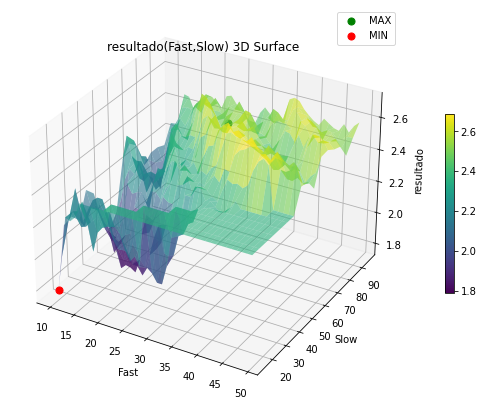

In [37]:
graf3D(df=resultado, clave_x='Fast', clave_y='Slow', clave_z='resultado', tipo_malla=False)

In [18]:
# Con este comando pueden usar una salida interactiva

In [19]:
%matplotlib inline

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


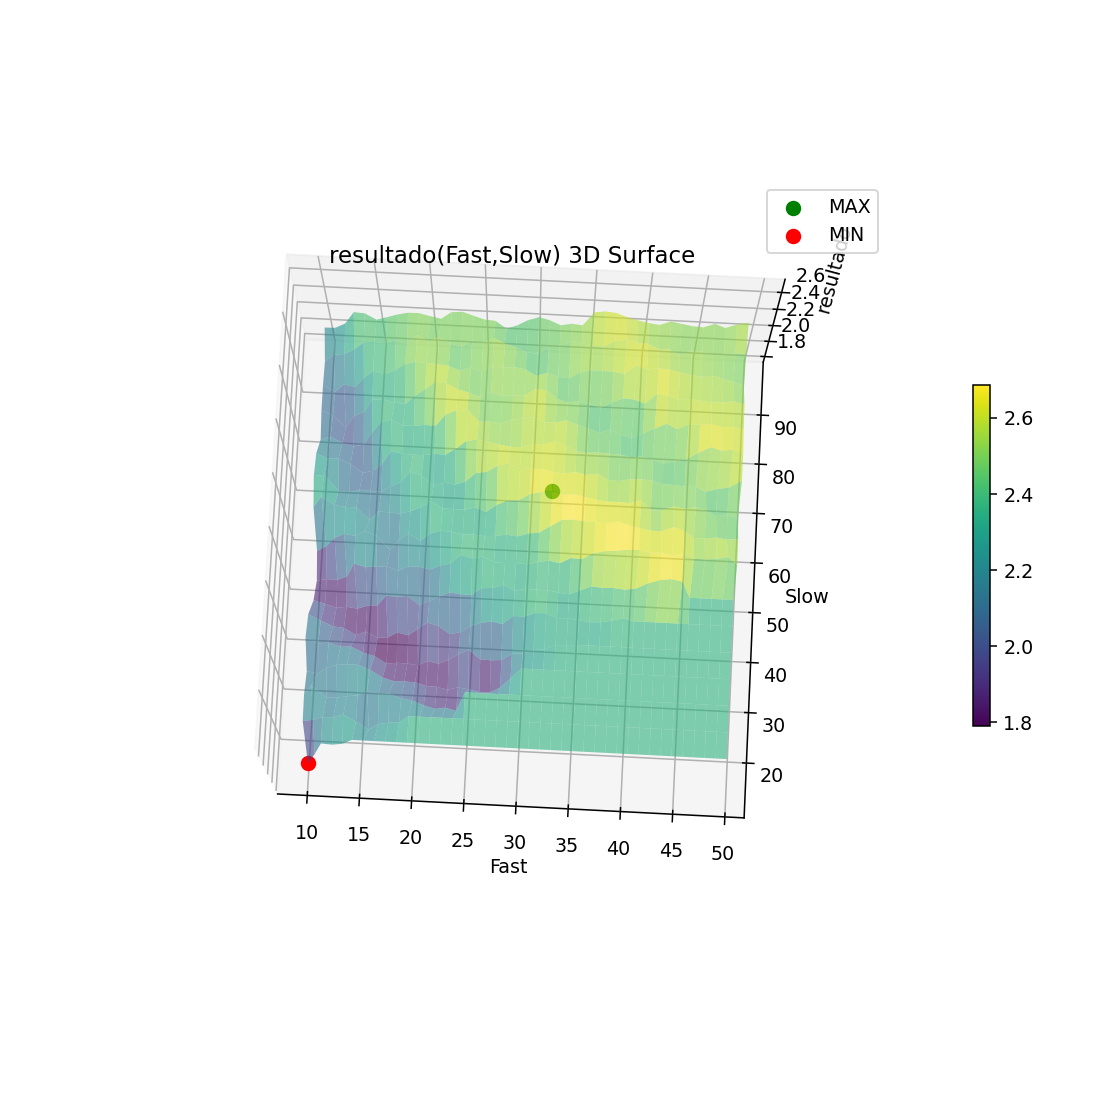

In [40]:
graf3D(df=resultado, clave_x='Fast', clave_y='Slow', clave_z='resultado', tipo_malla=False)

<IPython.core.display.Javascript object>


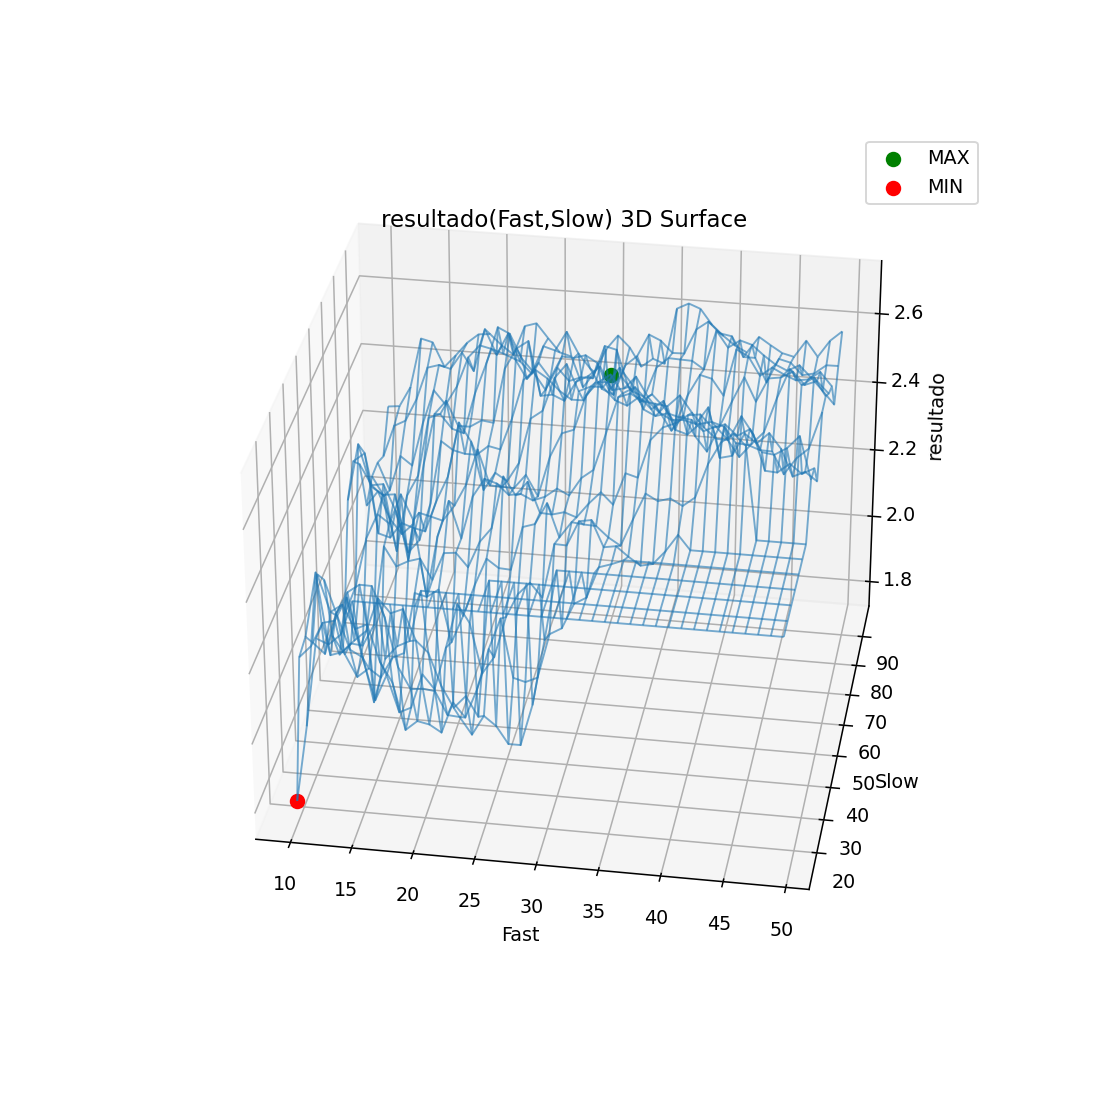

In [41]:
graf3D(df=resultado, clave_x='Fast', clave_y='Slow', clave_z='resultado', tipo_malla=True)

In [23]:
# Con este otro comando vuelven a la salida de pyplot original

In [24]:
%matplotlib inline

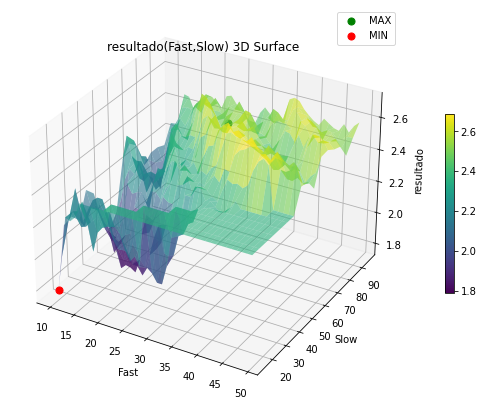

In [25]:
graf3D(df=resultado, clave_x='Fast', clave_y='Slow', clave_z='resultado', tipo_malla=False)

# MPT

## Fórmulas y concepto

https://en.wikipedia.org/wiki/Modern_portfolio_theory

$$ \Large R_{p} = \sum _{i} w_{i} R_{i}\quad $$

$$ \Large \sigma _{p}^{2}=\sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} $$

## Revisión I  -  Filtrado de los ceros

In [42]:
lista = [11,12,0]
lista2 = [1,2,3]
idx = ['a','b','c']
df = pd.DataFrame(list(zip(lista,lista2)), index=idx, columns=['a','b'])
df

,a,b
a,11,1
b,12,2
c,0,3


In [44]:
df_ceros = df.loc[(df==0).any(axis=1)]
df_ceros

,a,b
c,0,3


In [28]:
df_sin_ceros = df.loc[~(df==0).any(axis=1)]
df_sin_ceros

,a,b
a,11,1
b,12,2


Si quisiera las columnas que tienen o no tienen ceros

In [29]:
# Columnas cuyos valores son TODOS DISTINTOS de 0
df.loc[:, (df != 0).all(axis=0)]

,b
a,1
b,2
c,3


In [30]:
# Columnas donde ALGUN valor es IGUAL a 0 
df.loc[:, (df == 0).any(axis=0)]

,a
a,11
b,12
c,0


## Revisión II  -  Cálculo de sharpe de cartera

In [ ]:
# retorno / volatildad   quiero que sea lo mas alto posible

In [48]:
import numpy as np, yfinance as yf

df = yf.download(['AAPL','KO','PYPL'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
retornos = np.log((df/df.shift(1)).dropna())
pond = np.array([0.2, 0.4, 0.4])

r={}
r['retorno'] = np.sum( (retornos.mean() * pond * 252))

r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
r['sharpe'] = r['retorno'] / r['volatilidad'] 
r['ponderaciones'] = pond.round(2)
r

[*********************100%***********************]  3 of 3 completed


{'retorno': 0.22760223383672462,
 'volatilidad': 0.22216643234251704,
 'sharpe': 1.0244672493359714,
 'ponderaciones': array([0.2, 0.4, 0.4])}

## Revisión III  -  Doble producto matricial

ponderaciones por mat_covarianzas

In [32]:
mat_cov = (np.random.rand(3,3)*10).round()
mat_cov

array([[ 9.,  6.,  4.],
       [ 6., 10.,  0.],
       [ 8.,  8.,  6.]])

In [33]:
p  = [1,2,0]

pm1 = np.dot(mat_cov,p)
pm1

array([21., 26., 24.])

In [34]:
pm2 = np.dot(p,pm1)
pm2

73.0

# Markowitz - I

In [49]:
import yfinance as yf
import pandas as pd
import numpy as np

df = yf.download(['PYPL','AAPL'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 
retornos = np.log((df/df.shift(1)).dropna())

[*********************100%***********************]  2 of 2 completed


In [50]:
datosTickers = []
for ticker in df.columns:
    d = {}
    d['ticker'] = ticker
    d['retorno'] = retornos[ticker].mean() * 252
    d['volatilidad'] = retornos[ticker].std() * (252**0.5)
    d['sharpe'] = d['retorno'] / d['volatilidad']
    datosTickers.append(d)
    
    
datosTickers = pd.DataFrame(datosTickers).set_index('ticker')
datosTickers

,retorno,volatilidad,sharpe
ticker,,,
AAPL,0.277343,0.302028,0.918271
PYPL,0.337419,0.341380,0.988398


In [52]:
np.array(np.random.random(len(df.columns)))

array([0.92267007, 0.63084777])

In [53]:
q = 500
retornos = np.log((df/df.shift(1)).dropna())
carteras = [] 

for i in range(q):
    pond = np.array(np.random.random(len(df.columns)))
    pond = pond/np.sum(pond)
    r={}
    r['retorno'] = np.sum( (retornos.mean() * pond * 252))
    r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
    r['sharpe'] = r['retorno'] / r['volatilidad'] 
    r['pesos'] = pond.round(4)
    carteras.append(r)

carteras = pd.DataFrame(carteras)
carteras

,retorno,volatilidad,sharpe,pesos
0,0.321126,0.304219,1.055575,"[0.2712, 0.7288]"
1,0.324698,0.310996,1.044060,"[0.2117, 0.7883]"
2,0.294560,0.284190,1.036491,"[0.7134, 0.2866]"
3,0.329180,0.320649,1.026605,"[0.1371, 0.8629]"
4,0.317416,0.298107,1.064772,"[0.333, 0.667]"
...,...,...,...,...
495,0.300401,0.283636,1.059108,"[0.6162, 0.3838]"
496,0.312507,0.291569,1.071812,"[0.4147, 0.5853]"
497,0.300221,0.283610,1.058572,"[0.6192, 0.3808]"
498,0.308493,0.287610,1.072608,"[0.4815, 0.5185]"


In [56]:
carteras.sort_values('sharpe')

,retorno,volatilidad,sharpe,pesos
276,0.277418,0.301902,0.918900,"[0.9988, 0.0012]"
434,0.278271,0.300490,0.926057,"[0.9846, 0.0154]"
23,0.278335,0.300386,0.926591,"[0.9835, 0.0165]"
481,0.278345,0.300372,0.926667,"[0.9833, 0.0167]"
131,0.278624,0.299923,0.928985,"[0.9787, 0.0213]"
...,...,...,...,...
129,0.309673,0.288640,1.072867,"[0.4619, 0.5381]"
356,0.309705,0.288670,1.072868,"[0.4613, 0.5387]"
168,0.309923,0.288873,1.072868,"[0.4577, 0.5423]"
122,0.309744,0.288706,1.072869,"[0.4607, 0.5393]"


In [54]:
carteras.sharpe.max()

1.0728699238436865

In [39]:
carteras.sharpe.idxmax()

467

In [55]:
carteras.loc[ carteras.sharpe.idxmax(), 'pesos']

array([0.46, 0.54])

In [41]:
optimo = carteras.loc[carteras.sharpe.idxmax()]
mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']

datosTickers['ponderacion_optima'] = mejor_port
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
AAPL,0.277343,0.302028,0.918271,0.4591
PYPL,0.337419,0.341380,0.988398,0.5409


In [42]:
optimo

retorno                0.309837
volatilidad            0.288793
sharpe                  1.07287
pesos          [0.4591, 0.5409]
Name: 467, dtype: object

In [43]:
mejor_port

array([0.4591, 0.5409])

In [44]:
datosTickers

,retorno,volatilidad,sharpe,ponderacion_optima
ticker,,,,
AAPL,0.277343,0.302028,0.918271,0.4591
PYPL,0.337419,0.341380,0.988398,0.5409


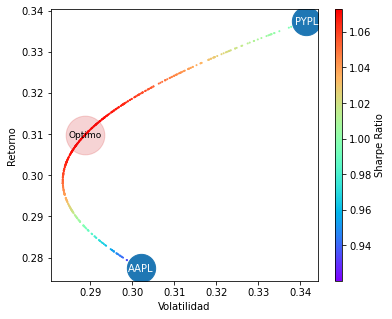

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')

plt.colorbar(label='Sharpe Ratio', aspect=40)
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')

plt.scatter(optimo.volatilidad, optimo.retorno, c='tab:red', alpha=0.2, s=1500) 
plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 

for ticker in df.columns:
    vol = datosTickers.loc[ticker,'volatilidad'] 
    ret = datosTickers.loc[ticker,'retorno'] 
    plt.scatter(vol, ret,  c='tab:blue', s=800) 
    plt.text(vol, ret, ticker, c='w', ha='center', va='center') 

In [57]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt

def markowitz(data, q=1000):
    retornos = np.log((data/data.shift(1)).dropna())
    carteras, datosTickers = [] , []
    
    for i in range(q):
        pond = np.array(np.random.random(len(data.columns)))
        pond = pond/np.sum(pond)
        r={}
        r['retorno'] = np.sum( (retornos.mean() * pond * 252))
        r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(retornos.cov()*252, pond)))
        r['sharpe'] = r['retorno'] / r['volatilidad'] 
        r['pesos'] =  pond.round(5)
        carteras.append(r)
    
    for ticker in data.columns:
        d = {}
        d['ticker'] = ticker
        d['retorno'] = retornos[ticker].mean() * 252
        d['volatilidad'] = retornos[ticker].std() * (252**0.5)
        d['sharpe'] = d['retorno'] / d['volatilidad']
        datosTickers.append(d)

    datosTickers = pd.DataFrame(datosTickers).set_index('ticker')    
    carteras = pd.DataFrame(carteras)

    optimo = carteras.loc[carteras.sharpe.idxmax()]
    mejor_port = carteras.iloc[carteras.sharpe.idxmax()]['pesos']
    datosTickers['ponderacion_optima'] = mejor_port

    plt.figure(figsize=(6,5))
    plt.scatter(carteras.volatilidad, carteras.retorno, c=carteras.sharpe, s=1, cmap='rainbow')
    plt.colorbar(label='Sharpe Ratio', aspect=40)
    plt.xlabel('Volatilidad')
    plt.ylabel('Retorno')
    plt.scatter(optimo.volatilidad, optimo.retorno,c='tab:red', alpha=0.2, s=1500) 
    plt.text(optimo.volatilidad, optimo.retorno, 'Optimo', fontsize=9, c='k', ha='center', va='center') 
       
    for ticker in data.columns:
        vol = datosTickers.loc[ticker,'volatilidad'] 
        ret = datosTickers.loc[ticker,'retorno'] 
        plt.scatter(vol, ret,  c='tab:blue', s=800) 
        plt.text(vol, ret, ticker, c='w', ha='center', va='center') 
    
    return (datosTickers.round(5), optimo)

In [58]:
%matplotlib inline

[*********************100%***********************]  5 of 5 completed
        retorno  volatilidad   sharpe  ponderacion_optima
ticker                                                   
AAPL    0.27734      0.30203  0.91827             0.31618
KO      0.09291      0.19733  0.47086             0.01014
NFLX    0.31747      0.42054  0.75491             0.18997
PYPL    0.33742      0.34138  0.98840             0.36034
VZ      0.08542      0.18898  0.45199             0.12337

Portafolio Optimo:
retorno                                             0.281065
volatilidad                                         0.252693
sharpe                                               1.11228
pesos          [0.31618, 0.01014, 0.18997, 0.36034, 0.12337]
Name: 253, dtype: object


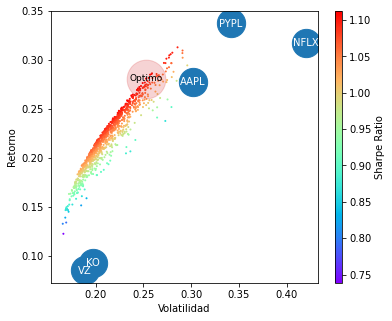

In [59]:
df = yf.download(['PYPL','AAPL', 'KO','VZ','NFLX'], start='2010-01-01', end='2021-01-01')['Adj Close']
df = df.loc[~(df==0).any(axis=1)] 


pond, optimo = markowitz ( df, q=1000)
print(pond, '\n\nPortafolio Optimo:\n',optimo, sep='')